# Bayesian Optimization Overview

In this example we will provide an overview of Bayesian Optimization using the following tutorial: 
https://medium.com/@okanyenigun/step-by-step-guide-to-bayesian-optimization-a-python-based-approach-3558985c6818 

In [45]:
import numpy as np
import matplotlib.pyplot as plt

In [61]:
def bb_function(x):
    return np.sin(x)+0.1*x

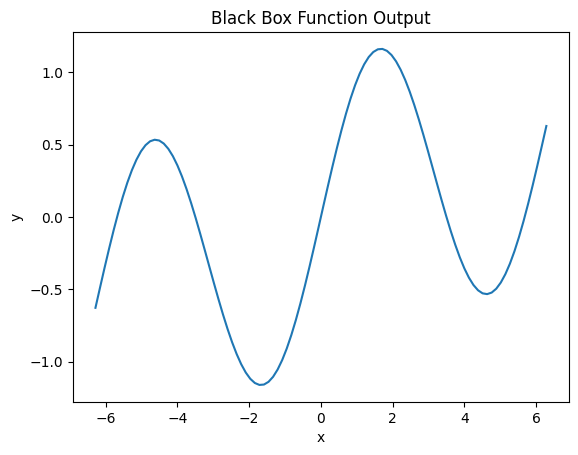

In [63]:
x_range = np.linspace(-2*np.pi, 2*np.pi, 100)
bb_output = bb_function(x_range)

#plot 
plt.plot(x_range,bb_output)
plt.xlabel('x')
plt.ylabel('y')
plt.title('Black Box Function Output')
plt.show()

## Surogate Model (Gaussian Process)

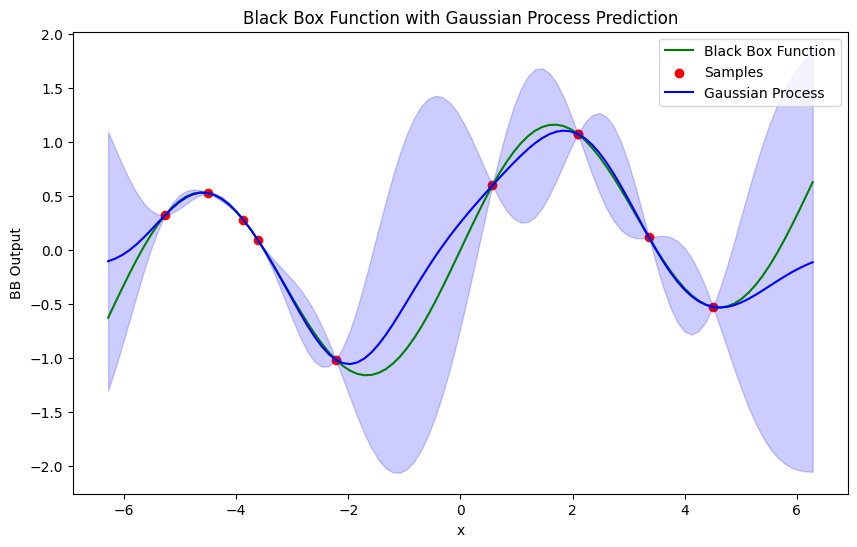

In [64]:
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import RBF
num_samples = 10
sample_x = np.random.choice(x_range, size = num_samples)
sample_y = bb_function(sample_x)
kernel = RBF(length_scale = 1.0)
gp_model = GaussianProcessRegressor(kernel = kernel)
gp_model.fit(sample_x.reshape(-1,1), sample_y) # fit the Gaussian model to the sampled points we had 
y_pred, y_std = gp_model.predict(x_range.reshape(-1,1), return_std = True)

#plotting code 
plt.figure(figsize = (10,6))
plt.plot(x_range, bb_function(x_range), color = 'green', label = 'Black Box Function')
plt.scatter(sample_x, sample_y, color = 'Red', label = 'Samples')
plt.plot(x_range, y_pred, color = 'blue', label = 'Gaussian Process')
plt.fill_between(x_range, y_pred - 2*y_std, y_pred + 2*y_std, color='blue', alpha=0.2)
plt.xlabel('x')
plt.ylabel('BB Output')
plt.title('Black Box Function with Gaussian Process Prediction')
plt.legend()
plt.show()

# Acquisition Function


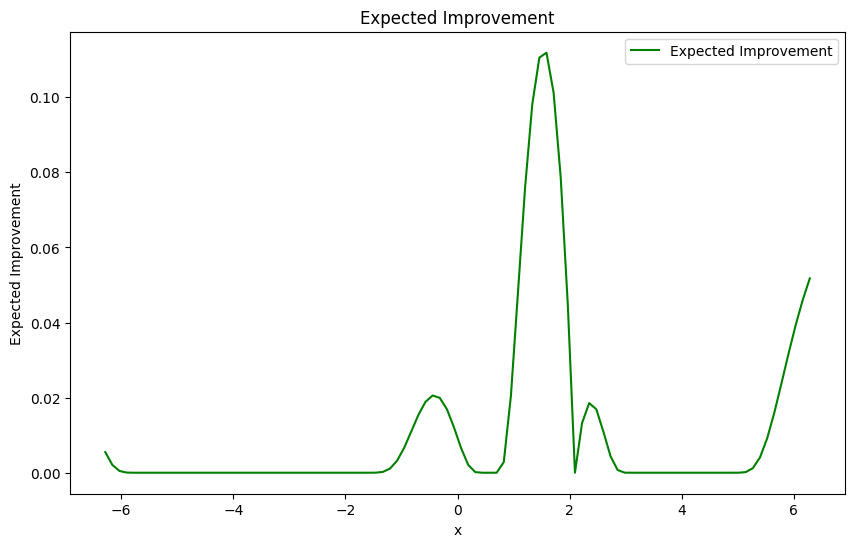

In [65]:
from scipy.stats import norm

def expected_improvment(x, gp_model, best_y):
    y_pred, y_std = gp_model.predict(x.reshape(-1,1), return_std = True)
    z = (y_pred - best_y)/y_std 
    ei = (y_pred - best_y)*norm.cdf(z) + y_std*norm.pdf(z)
    return ei

best_idx = np.argmax(sample_y)
best_x = sample_x[best_idx]
best_y = sample_y[best_idx]
ei = expected_improvment(x_range, gp_model, best_y)
# Plot the expected improvement
plt.figure(figsize=(10, 6))
plt.plot(x_range, ei, color='green', label='Expected Improvement')
plt.xlabel('x')
plt.ylabel('Expected Improvement')
plt.title('Expected Improvement')
plt.legend()
plt.show()


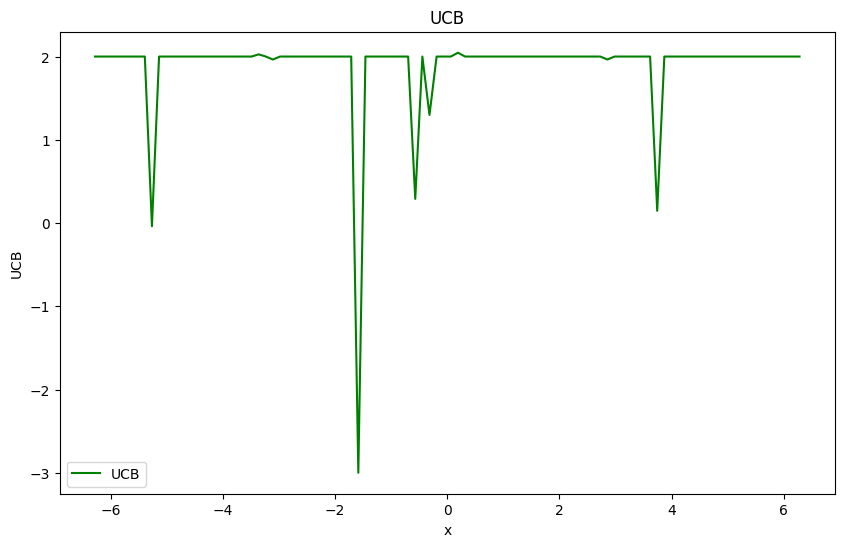

In [50]:
def upper_confidence_bound(x, gp_model, beta):
    y_pred, y_std = gp_model.predict(x.reshape(-1,1), return_std = True)
    ucb = y_pred + beta*y_std
    return ucb

beta = 2.0
ucb = upper_confidence_bound(x_range, gp_model, beta)
plt.figure(figsize=(10, 6))
plt.plot(x_range, ucb, color='green', label='UCB')
plt.xlabel('x')
plt.ylabel('UCB')
plt.title('UCB')
plt.legend()
plt.show()

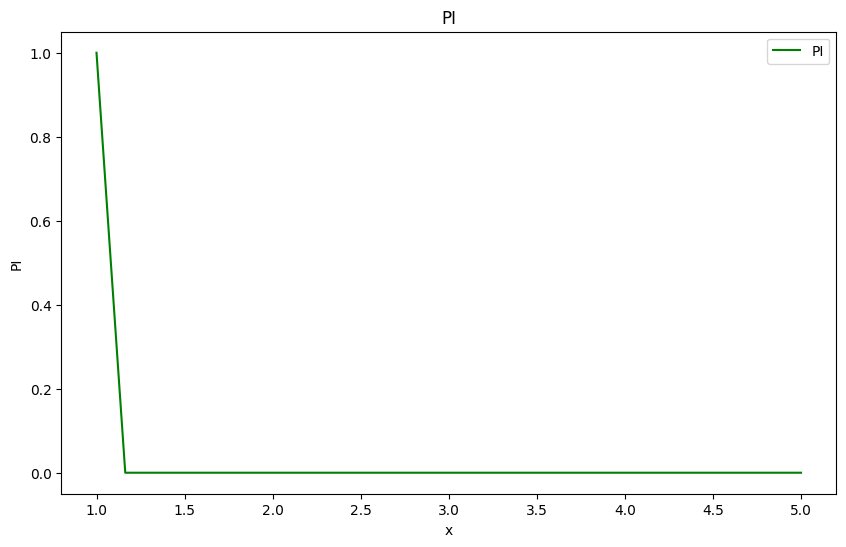

In [59]:
def probability_of_improvement(x, gp_mode, y_best):
    y_pred, y_std = gp_model.predict(x.reshape(-1, 1), return_std=True)
    z = (y_pred - best_y)/y_std 
    pi = norm.cdf(z)
    return pi
pi = probability_of_improvement(x_range, gp_model, best_y)
plt.figure(figsize=(10, 6))
plt.plot(x_range, pi, color='green', label='PI')
plt.xlabel('x')
plt.ylabel('PI')
plt.title('PI')
plt.legend()
plt.show()

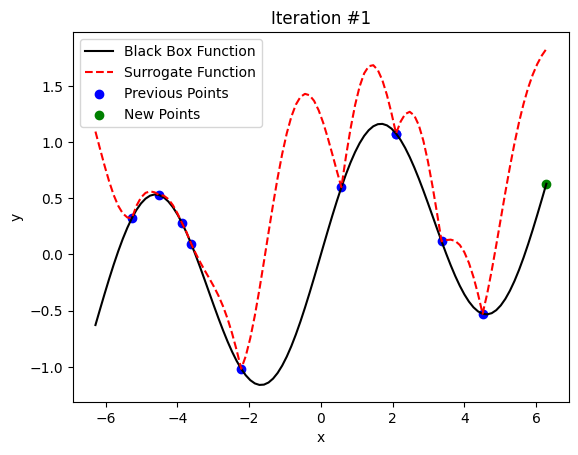

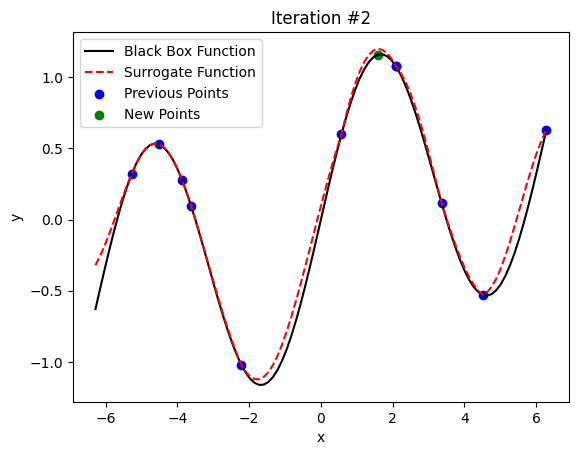

/Users/advaykoranne/Library/Python/3.9/lib/python/site-packages/sklearn/gaussian_process/_gpr.py:616: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  _check_optimize_result("lbfgs", opt_res)


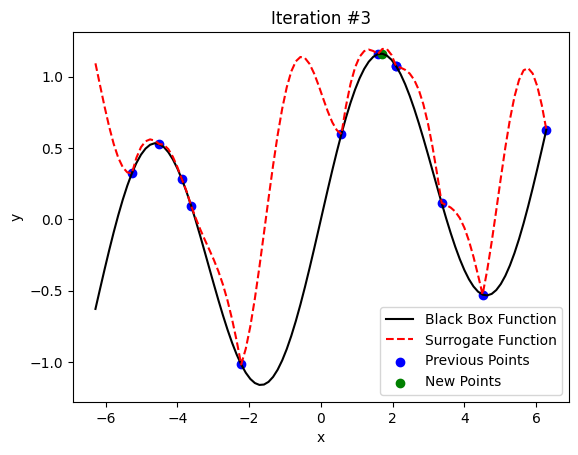

/Users/advaykoranne/Library/Python/3.9/lib/python/site-packages/sklearn/gaussian_process/_gpr.py:616: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  _check_optimize_result("lbfgs", opt_res)


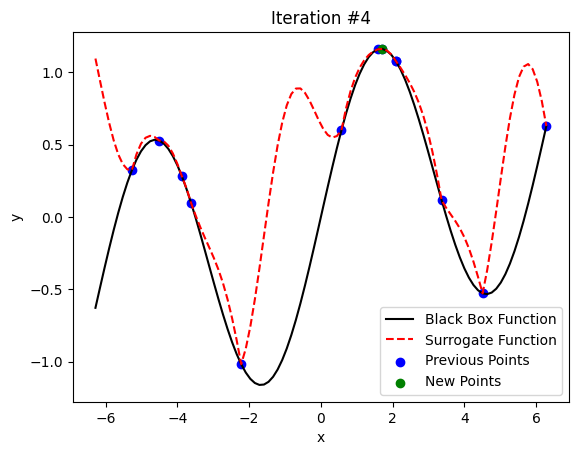

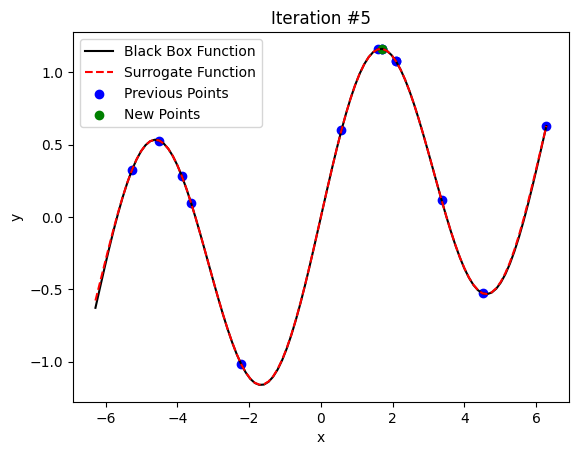

/Users/advaykoranne/Library/Python/3.9/lib/python/site-packages/sklearn/gaussian_process/_gpr.py:616: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  _check_optimize_result("lbfgs", opt_res)


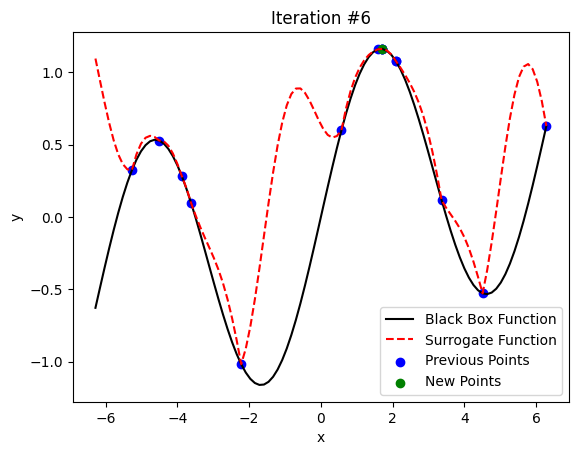

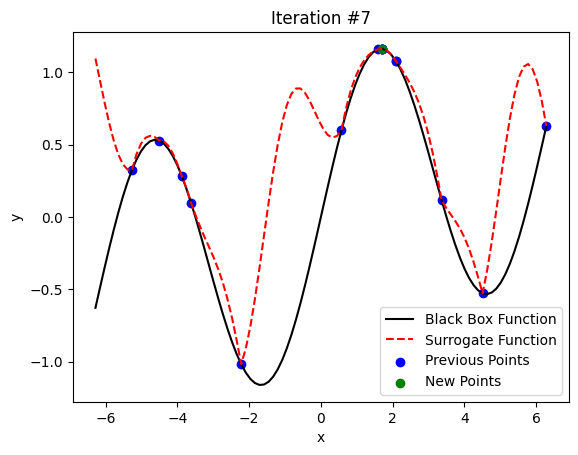

/Users/advaykoranne/Library/Python/3.9/lib/python/site-packages/sklearn/gaussian_process/_gpr.py:616: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  _check_optimize_result("lbfgs", opt_res)


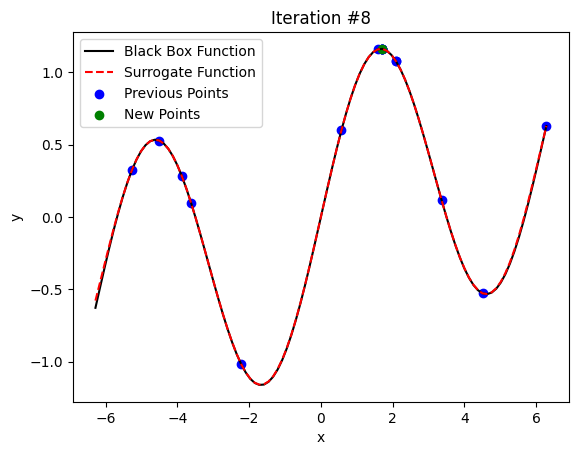

/Users/advaykoranne/Library/Python/3.9/lib/python/site-packages/sklearn/gaussian_process/_gpr.py:616: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  _check_optimize_result("lbfgs", opt_res)


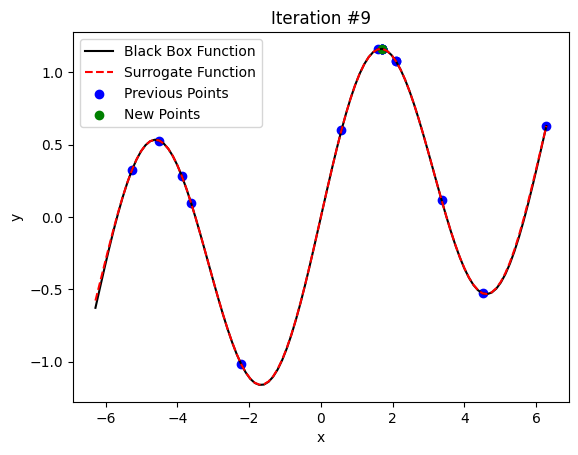

/Users/advaykoranne/Library/Python/3.9/lib/python/site-packages/sklearn/gaussian_process/_gpr.py:616: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  _check_optimize_result("lbfgs", opt_res)


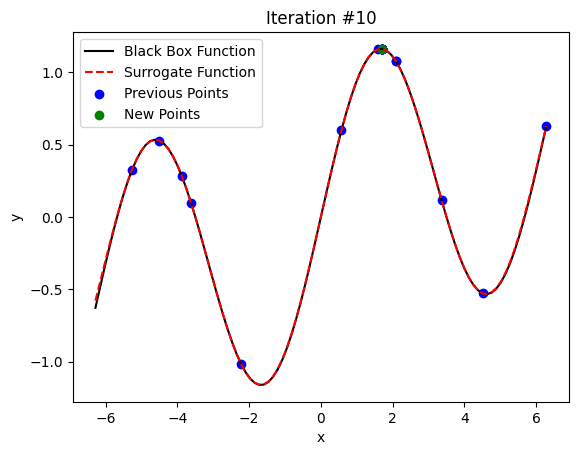

/Users/advaykoranne/Library/Python/3.9/lib/python/site-packages/sklearn/gaussian_process/_gpr.py:616: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  _check_optimize_result("lbfgs", opt_res)


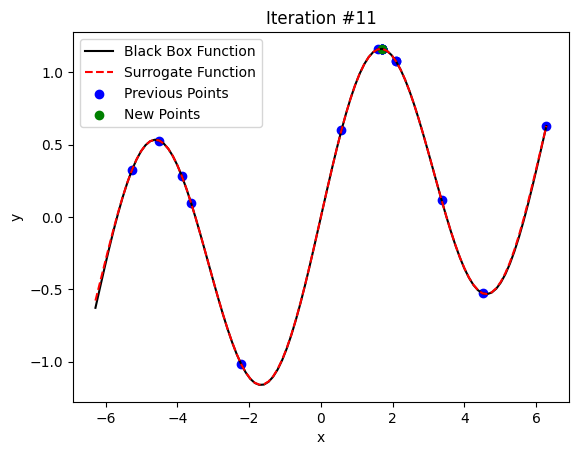

/Users/advaykoranne/Library/Python/3.9/lib/python/site-packages/sklearn/gaussian_process/_gpr.py:616: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  _check_optimize_result("lbfgs", opt_res)


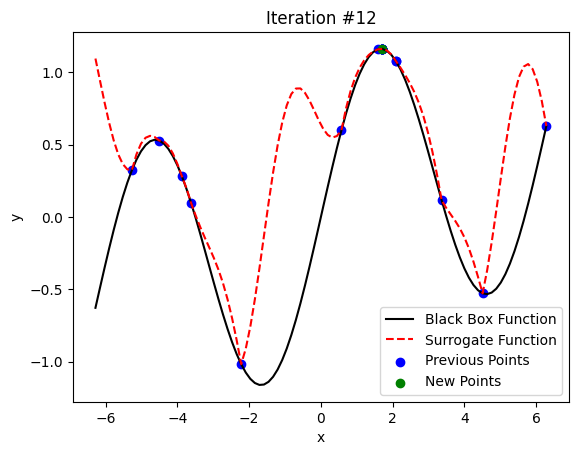

/Users/advaykoranne/Library/Python/3.9/lib/python/site-packages/sklearn/gaussian_process/_gpr.py:616: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  _check_optimize_result("lbfgs", opt_res)


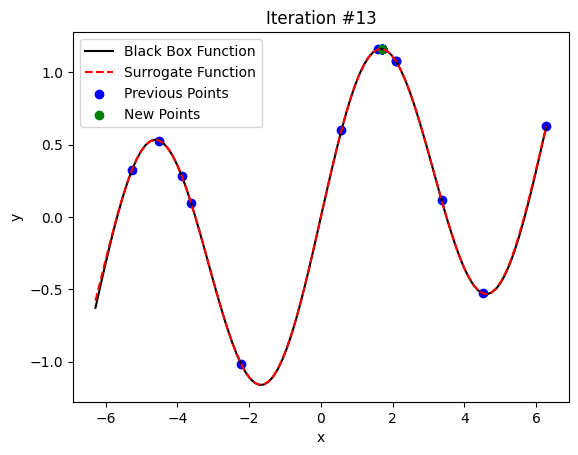

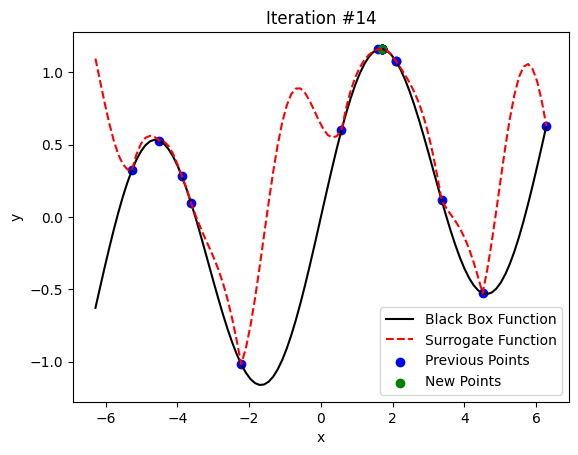

/Users/advaykoranne/Library/Python/3.9/lib/python/site-packages/sklearn/gaussian_process/_gpr.py:616: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  _check_optimize_result("lbfgs", opt_res)


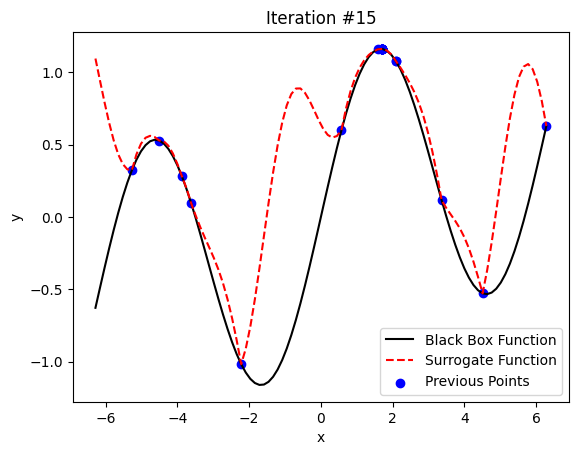

In [66]:
num_iter = 15
for i in range(num_iter):
    gp_model.fit(sample_x.reshape(-1,1), sample_y)
    best_idx = np.argmax(sample_y)
    best_x = sample_x[best_idx]
    best_y = sample_y[best_idx]
    beta = 2.0 
    ucb = upper_confidence_bound(x_range, gp_model, beta)
    plt.plot(x_range, bb_function(x_range), color='black', label='Black Box Function')
    plt.plot(x_range, ucb, color='red', linestyle='dashed', label='Surrogate Function')
    plt.scatter(sample_x, sample_y, color='blue', label='Previous Points')
    if i < num_iter - 1:
        new_x = x_range[np.argmax(ucb)]  # Select the next point based on UCB
        new_y = bb_function(new_x)
        sample_x = np.append(sample_x, new_x)
        sample_y = np.append(sample_y, new_y)
        plt.scatter(new_x, new_y, color='green', label='New Points')

    plt.xlabel('x')
    plt.ylabel('y')
    plt.title(f"Iteration #{i+1}")
    plt.savefig(f'/Users/advaykoranne/Desktop/Home/spring2024/CS4701/plots/iter_{i+1}.png')
    plt.legend()
    plt.show()


In [53]:
import cv2

# Define the codec and create VideoWriter object
fourcc = cv2.VideoWriter_fourcc(*'mp4v')  # or 'XVID'
out = cv2.VideoWriter('output.mp4', fourcc, 1.0, (640, 480))

for i in range(1, num_iter):
    img_path = f'/Users/advaykoranne/Desktop/Home/spring2024/CS4701/plots/iter_{i+1}.png'
    frame = cv2.imread(img_path)
    frame = cv2.resize(frame, (640, 480))
    out.write(frame)

out.release()
print("Video saved.")

Video saved.


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from hyperopt import fmin, tpe, hp, STATUS_OK, Trials

In [ ]:
# Define the space over which to search
space = hp.uniform('x', -2 * np.pi, 2 * np.pi)

In [ ]:
#Define an objective to minimize (we negate bb_function to simulate maximization)
def objective(x):
    return {'loss': -bb_function(x), 'status': STATUS_OK}

In [ ]:
trials = Trials()  # Create a Trials object to store data

# Run TPE optimization
best = fmin(
    fn=objective,
    space=space,
    algo=tpe.suggest,
    max_evals=50  # Number of evaluations
)

# Extracting all tried x points and corresponding y values
x_trials = [trial['misc']['vals']['x'][0] for trial in trials.trials if trial['misc']['vals']['x']]
y_trials = [-trial['result']['loss'] for trial in trials.trials if trial['result']['loss'] is not None]

# Best point
x_best = best['x']
y_best = bb_function(x_best)

# Generate plot data
x_range = np.linspace(-2 * np.pi, 2 * np.pi, 100)
bb_output = bb_function(x_range)

# Plot everything
plt.figure(figsize=(10, 6))
plt.plot(x_range, bb_output, label='Black Box Function', color='green')
plt.scatter(x_trials, y_trials, color='red', label='Sampled Points', s=50, alpha=0.6)
plt.scatter(x_best, y_best, color='blue', label=f'Best Point: ({x_best:.2f}, {y_best:.2f})', s=100)
plt.xlabel('x')
plt.ylabel('y')
plt.title('Black Box Function Optimization via TPE')
plt.legend()
plt.show()